In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
train=pd.read_csv('train.csv')

In [3]:
train.head(1)

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662907 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


In [5]:
train.shape

(750000, 12)

In [6]:
#feature Extraction
features=['id','Episode_Length_minutes','Host_Popularity_percentage','Guest_Popularity_percentage','Number_of_Ads','Episode_Sentiment','Listening_Time_minutes']

In [7]:
train['Episode_Sentiment']=train['Episode_Sentiment'].replace({'Positive':1,'Negative':-1,'Neutral':0})

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662907 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  int64  
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 68.7+ MB


In [9]:
train['Guest_Popularity_percentage']=train['Guest_Popularity_percentage'].fillna(train['Guest_Popularity_percentage'].mean())

In [10]:
train['Episode_Length_minutes']=train['Episode_Length_minutes'].fillna(train['Episode_Length_minutes'].mean())

In [11]:
train['Number_of_Ads']=train['Number_of_Ads'].fillna(train['Episode_Length_minutes'].mean())

In [12]:
new_train=train[features]

In [13]:
new_train.shape

(750000, 7)

In [14]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 7 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Episode_Length_minutes       750000 non-null  float64
 2   Host_Popularity_percentage   750000 non-null  float64
 3   Guest_Popularity_percentage  750000 non-null  float64
 4   Number_of_Ads                750000 non-null  float64
 5   Episode_Sentiment            750000 non-null  int64  
 6   Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 40.1 MB


In [15]:
model=LinearRegression()
X=new_train.drop('Listening_Time_minutes',axis=1)
y=new_train['Listening_Time_minutes']

In [16]:
model.fit(X,y)

LinearRegression()

In [17]:
#now import test data to predict values
test=pd.read_csv('test.csv')

In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           250000 non-null  int64  
 1   Podcast_Name                 250000 non-null  object 
 2   Episode_Title                250000 non-null  object 
 3   Episode_Length_minutes       221264 non-null  float64
 4   Genre                        250000 non-null  object 
 5   Host_Popularity_percentage   250000 non-null  float64
 6   Publication_Day              250000 non-null  object 
 7   Publication_Time             250000 non-null  object 
 8   Guest_Popularity_percentage  201168 non-null  float64
 9   Number_of_Ads                250000 non-null  float64
 10  Episode_Sentiment            250000 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 21.0+ MB


In [19]:
features.pop()

'Listening_Time_minutes'

In [20]:
features

['id',
 'Episode_Length_minutes',
 'Host_Popularity_percentage',
 'Guest_Popularity_percentage',
 'Number_of_Ads',
 'Episode_Sentiment']

In [21]:
test['Episode_Length_minutes']=test['Episode_Length_minutes'].fillna(test['Episode_Length_minutes'].mean())

In [22]:
test['Guest_Popularity_percentage']=test['Guest_Popularity_percentage'].fillna(test['Guest_Popularity_percentage'].mean())

In [23]:
new_test=test[features]

In [24]:
new_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 6 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           250000 non-null  int64  
 1   Episode_Length_minutes       250000 non-null  float64
 2   Host_Popularity_percentage   250000 non-null  float64
 3   Guest_Popularity_percentage  250000 non-null  float64
 4   Number_of_Ads                250000 non-null  float64
 5   Episode_Sentiment            250000 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 11.4+ MB


In [25]:
new_test['Episode_Sentiment']=new_test['Episode_Sentiment'].replace({'Positive':1,'Negative':-1,'Neutral':0})

C:\Users\karan_s81xe2a\AppData\Local\Temp\ipykernel_22540\3697711836.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_test['Episode_Sentiment']=new_test['Episode_Sentiment'].replace({'Positive':1,'Negative':-1,'Neutral':0})


In [26]:
new_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 6 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           250000 non-null  int64  
 1   Episode_Length_minutes       250000 non-null  float64
 2   Host_Popularity_percentage   250000 non-null  float64
 3   Guest_Popularity_percentage  250000 non-null  float64
 4   Number_of_Ads                250000 non-null  float64
 5   Episode_Sentiment            250000 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 11.4 MB


In [27]:
predictions=model.predict(new_test)

In [28]:
predictions.shape

(250000,)

In [29]:
predictions[:20]

array([ 56.12039321,  20.51872579,  51.67628054,  81.909891  ,
        50.45950744,  25.68525758,  84.52314027,  39.47539498,
        69.3711812 ,  71.55321271,  12.41878238,  25.21239421,
        32.62785184, 313.97070362,  48.70514267,  59.86080464,
       315.64719472,  34.12584272,  62.55870771,  43.08067782])

In [30]:
submissions=pd.read_csv('sample_submission.csv')

In [31]:
submissions['Listening_Time_minutes']=predictions

In [32]:
submissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 2 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      250000 non-null  int64  
 1   Listening_Time_minutes  250000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 3.8 MB


In [33]:
submissions.to_csv('submissions.csv',index=False)

In [34]:
from sklearn.ensemble import GradientBoostingRegressor

In [35]:
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

In [ ]:
gb_model.fit(X,y)

In [ ]:
new_predictions=gb_model.predict(new_test)

In [ ]:
submissions['Listening_Time_minutes']=new_predictions
submissions.to_csv('newsubmissions.csv',index=False)

In [ ]:
# sns.pairplot(new_train)

In [ ]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 7 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Episode_Length_minutes       750000 non-null  float64
 2   Host_Popularity_percentage   750000 non-null  float64
 3   Guest_Popularity_percentage  750000 non-null  float64
 4   Number_of_Ads                750000 non-null  float64
 5   Episode_Sentiment            750000 non-null  int64  
 6   Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 40.1 MB


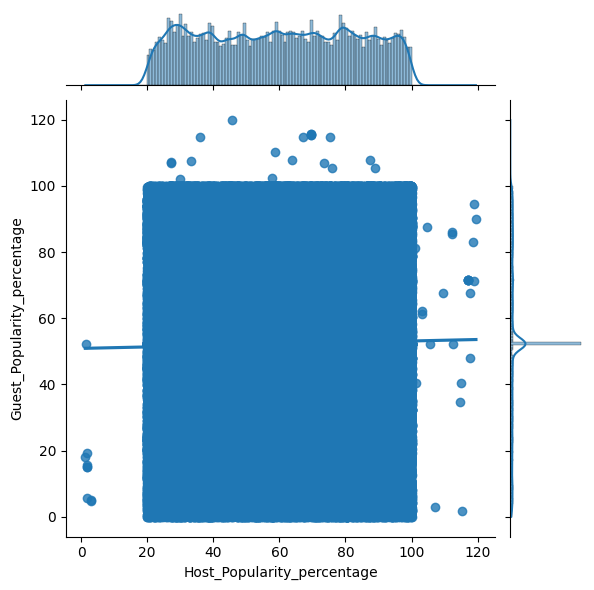

In [ ]:
sns.jointplot(x='Host_Popularity_percentage',y='Guest_Popularity_percentage',kind='reg',data=new_train)

In [ ]:
sample=pd.read_csv('sample_submission.csv')
sns.regplot(x=predictions,hue=sample['Listening_Time_minutes'],y=new_predictions,data=new_train)

TypeError: regplot() got an unexpected keyword argument 'hue'

: 